---
# Scrape the rest and generate the final data
    This script scrape the rest of Forbes articles in batches
---

In [6]:
#------

In [22]:
## import libraries to work

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import concurrent
import glob  # Import the glob module for file path matching

### First Part:
    Split scraped urls from non_scraped and leave Forbes urls ready to work
---

In [3]:
%pwd

'/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Media Cloud/scripts'

In [2]:
urls_raw = pd.read_pickle('/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Media Cloud/Data/media_urls.pkl')
scrape_first = pd.read_pickle('/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Media Cloud/Data/scraped_news.pkl')
forbes = pd.read_csv('/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Media Cloud/Data/forbes_scrape.csv')

In [3]:
## drop duplicates
urls_raw = urls_raw.drop_duplicates(subset=['url'],keep='first')
scrape_first = scrape_first.drop_duplicates(subset=['URL'],keep='first')

In [4]:
## Split scraped from non_scraped urls
scraped_good = scrape_first[scrape_first['Body'] != 'NA']
non_scraped = scrape_first[scrape_first['Body'] == 'NA']

## Join scraped urls with original info
scraped_work = pd.merge(scraped_good, urls_raw, left_on='ID', right_on='stories_id', how='left')

## Join non_scraped urls with original info
non_scraped_work = pd.merge(non_scraped, urls_raw, left_on='ID', right_on='stories_id', how='left')

In [7]:
## Extract only Forbes non_scraped urls and drop duplicates
non_scraped_forbes = non_scraped_work[non_scraped_work['media_name'] == 'Forbes']

non_scraped_forbes = non_scraped_forbes.drop_duplicates(subset=['URL'],keep='first')

In [8]:
forbes_full = pd.merge(non_scraped_forbes, forbes,left_on='ID', right_on='ID', how='right' )

In [10]:
columns_drop = ['guid','processed_stories_id','url']
forbes_full = forbes_full.drop(columns=columns_drop)

In [45]:
forbes_full.columns
#forbes

Index(['ID', 'URL', 'Body', 'Title', 'collect_date', 'media_name',
       'publish_date', 'stories_id', 'story_tags', 'title'],
      dtype='object')

In [12]:
columns_drop = ['Error', 'ap_syndicated','MetaData','Tags','word_count','feeds', 'guid', 'language', 'media_id','MetaKeywords',
               'processed_stories_id','media_url','url']
scraped_work = scraped_work.drop(columns=columns_drop)

In [13]:
# Reorder columns of forbes_full to match the desired order
columns_forbes = ['ID', 'URL_y', 'Body_y', 
                  'Title_y', 'collect_date', 'media_id',
                  'media_name', 'publish_date', 'stories_id', 'story_tags','title']
forbes_full = forbes_full[columns_forbes]
# Rename columns of forbes_full to match the columns of scraped_work
forbes_full = forbes_full.rename(columns={'URL_y': 'URL', 'Title_y': 'Title',
                                         'Body_y': 'Body'})
forbes_full

In [14]:
# Rename columns of forbes_full to match the columns of scraped_work
forbes_full = forbes_full.rename(columns={'URL_y': 'URL', 'Title_y': 'Title',
                                         'Body_y': 'Body'})
forbes_full

,ID,URL,Body,Title,collect_date,media_id,media_name,publish_date,stories_id,story_tags,title
0,2785680763,https://www.forbes.com/sites/renaegregoire/202...,"Two cyborg woman heads and circuit brain, mind...","AI Showdown, Part 3: ChatGPT, Claude, Bing, An...",2023-10-01 09:15:11.534651,1104,Forbes,2023-10-01 09:11:00,2785680763,"[{'stories_id': 2785680763, 'tag': 'nyt_labell...","AI Showdown, Part 3: ChatGPT, Claude, Bing, An..."
1,2785815226,https://www.forbes.com/sites/mollybohannon/202...,PAW Patrol: The Mighty Movie took the first sp...,‘Paw Patrol’ Sequel Leads Weekend Box Office—A...,2023-10-01 12:43:38.315263,1104,Forbes,2023-10-01 12:31:06,2785815226,"[{'stories_id': 2785815226, 'tag': 'geonames_6...",‘Paw Patrol’ Sequel Leads Weekend Box Office—A...
2,2785833627,https://www.forbes.com/sites/billeehoward/2023...,"Customer-obsession was the North Star of 2023,...",Top 4 Insights All C-Suite Leaders And Market ...,2023-10-01 13:11:21.789306,1104,Forbes,2023-10-01 13:00:00,2785833627,"[{'stories_id': 2785833627, 'tag': 'geonames_3...",Top 4 Insights All C-Suite Leaders + Market Re...
3,2786036381,https://www.forbes.com/sites/robtoews/2023/10/...,"Meta CEO Mark Zuckerberg, Nvidia CEO Jensen Hu...",10 Hypothetical Blockbuster AI Acquisitions,2023-10-01 20:06:21.151211,1104,Forbes,2023-10-01 19:23:45,2786036381,"[{'stories_id': 2786036381, 'tag': 'geonames_6...",10 Blockbuster AI M&A Deals On The Horizon
4,2786326393,https://www.forbes.com/sites/emmawoollacott/20...,Shattered glass with padlock icon and national...,Freedom On The Net Report Highlights Dangers O...,2023-10-02 05:46:19.789492,1104,Forbes,2023-10-02 05:31:28,2786326393,[],Freedom On The Net Report Highlights Dangers O...
...,...,...,...,...,...,...,...,...,...,...,...
546,2814644498,https://www.forbes.com/sites/forbescommunicati...,"\nIn today’s fast-paced, social-media fueled ...",12 Smart Ways To Monitor And Manage A Company’...,2023-11-01 13:20:42.474719,1104,Forbes,2023-11-01 13:15:00,2814644498,[],12 Smart Ways To Monitor And Manage A Company’...
547,2814742635,https://www.forbes.com/sites/antoniopequenoiv/...,AMD’s stock surged more than 8% Wednesday foll...,AMD Shares Jump Over 8% After Optimistic AI Ch...,2023-11-01 15:19:22.320620,1104,Forbes,2023-11-01 15:06:00,2814742635,[],AMD Shares Jump Over 8% After Optimistic AI Ch...
548,2814765263,https://www.forbes.com/sites/miltonezrati/2023...,A rare sighting in today's China. (Photo By: M...,China’s Demographic Catastrophe,2023-11-01 15:48:47.081098,1104,Forbes,2023-11-01 15:42:13,2814765263,[],China’s Demographic Catastrophe
549,2814851102,https://www.forbes.com/sites/alexknapp/2023/11...,InnovationRx is your weekly digest of healthca...,InnovationRx: The VA’s Call For AI Tools,2023-11-01 17:47:18.030689,1104,Forbes,2023-11-01 17:40:09,2814851102,[],InnovationRx: The VA’s Call For AI Tools


In [15]:
#reorder columns from scraped urls
columns_scraped = ['ID', 'URL', 'Body','Title','collect_date','media_name','publish_date','stories_id','story_tags', 'title',
                   'Authors', 'Date',  'Summary','metadata']
scraped_work = scraped_work[columns_scraped]

In [16]:
drop = ['Authors', 'Date','metadata']
scraped_work = scraped_work.drop(columns=drop)

In [17]:
print(scraped_work.columns)
#print(forbes_full.columns)
drop = ['media_id']
forbes_full = forbes_full.drop(columns=drop)

Index(['ID', 'URL', 'Body', 'Title', 'collect_date', 'media_name',
       'publish_date', 'stories_id', 'story_tags', 'title', 'Summary'],
      dtype='object')


In [18]:
# Concatenate the DataFrames
concatenated_df = pd.concat([scraped_work, forbes_full], ignore_index=True)
concatenated_df

,ID,URL,Body,Title,collect_date,media_name,publish_date,stories_id,story_tags,title,Summary
0,1838925040,https://news.mongabay.com/2021/02/eye-in-the-s...,An interdisciplinary team of zoologists and co...,Eye in the Sky: Tech makes satellite imagery i...,2021-02-01 11:29:05.575011,Mongabay,2021-02-01 03:11:18,1838925040,[],Eye in the Sky: Tech makes satellite imagery i...,Satellite surveying still offers many advantag...
1,1839017422,https://www.cnbc.com/2021/02/01/amazon-alphabe...,"Ali Ghodsi, co-founder and CEO of Databricks I...","Amazon, Alphabet and Salesforce are all invest...",2021-02-01 13:30:32.746109,CNBC,2021-02-01 13:28:31,1839017422,[],"Amazon, Alphabet and Salesforce are all invest...","Ali Ghodsi, co-founder and CEO of Databricks I..."
2,1839009079,http://feeds.benzinga.com/~r/benzinga/~3/JWduJ...,One of the hottest names in the investing worl...,15 Big Ideas In 'Disruptive Innovation' Accord...,2021-02-01 13:24:21.419836,Benzinga,2021-02-01 13:17:36,1839009079,[],15 Big Ideas In 'Disruptive Innovation' Accord...,One of the hottest names in the investing worl...
3,1838767296,https://eurweb.com/2021/01/31/black-creators-a...,*It’s day four at the 2021 Sundance Film Festi...,Black Creators At Sundance 2021,2021-02-01 11:22:41.615668,eurweb,2021-02-01 02:05:19,1838767296,[],Black Creators At Sundance 2021,*It’s day four at the 2021 Sundance Film Festi...
4,1839090241,http://feeds.benzinga.com/~r/benzinga/~3/y-hmu...,Loading... Loading...\n\nBill.com BILL shares ...,Why Bill.com's Stock Is Trading Higher Today -...,2021-02-01 14:26:32.665619,Benzinga,2021-02-01 14:07:26,1839090241,[],Why Bill.com's Stock Is Trading Higher Today,Loading... Loading...Bill.com BILL shares are ...
...,...,...,...,...,...,...,...,...,...,...,...
74128,2814644498,https://www.forbes.com/sites/forbescommunicati...,"\nIn today’s fast-paced, social-media fueled ...",12 Smart Ways To Monitor And Manage A Company’...,2023-11-01 13:20:42.474719,Forbes,2023-11-01 13:15:00,2814644498,[],12 Smart Ways To Monitor And Manage A Company’...,NaN
74129,2814742635,https://www.forbes.com/sites/antoniopequenoiv/...,AMD’s stock surged more than 8% Wednesday foll...,AMD Shares Jump Over 8% After Optimistic AI Ch...,2023-11-01 15:19:22.320620,Forbes,2023-11-01 15:06:00,2814742635,[],AMD Shares Jump Over 8% After Optimistic AI Ch...,NaN
74130,2814765263,https://www.forbes.com/sites/miltonezrati/2023...,A rare sighting in today's China. (Photo By: M...,China’s Demographic Catastrophe,2023-11-01 15:48:47.081098,Forbes,2023-11-01 15:42:13,2814765263,[],China’s Demographic Catastrophe,NaN
74131,2814851102,https://www.forbes.com/sites/alexknapp/2023/11...,InnovationRx is your weekly digest of healthca...,InnovationRx: The VA’s Call For AI Tools,2023-11-01 17:47:18.030689,Forbes,2023-11-01 17:40:09,2814851102,[],InnovationRx: The VA’s Call For AI Tools,NaN


In [86]:
concatenated_df.to_pickle('news-all.pkl')

---
## Scrape Forbes again
---

In [2]:
def forbes_scrape(urls, ids_):
    article_data = {
        'ID': [],
        'URL': [],
        'Body': [],
        'Title': [],
        'Error': [],
    }

    errors = []

    start_time = time.time()

    for url, id_ in zip(urls, ids_):  # Use zip to iterate over both lists simultaneously
        try:
            # Adding a delay between requests to avoid being blocked
            time.sleep(5)
            
            response = requests.get(url)
            response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)
            
            soup = BeautifulSoup(response.text, 'html.parser')
           # title = (soup.find('title')).get_text()
            title_element = soup.find('title')
            title = title_element.get_text() if title_element else None

            body = soup.find_all('p')

            article_data['Title'].append(title)

            body_text = ""
            for text in body:
                body_text += text.get_text() + "\n"

            article_data['Body'].append(body_text)
            article_data['ID'].append(id_)
            article_data['URL'].append(url)
            article_data['Error'].append(None)  # No error for this entry
            
        except requests.exceptions.RequestException as e:
            errors.append(f"Error processing URL {url}: {str(e)}")
            article_data['Title'].append(None)
            article_data['Body'].append(None)
            article_data['ID'].append(id_)
            article_data['URL'].append(url)
            article_data['Error'].append(str(e))

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Time taken to fetch and parse articles: {elapsed_time:.2f} seconds")

    if errors:
        print("Errors:")
        for error in errors:
            print(error)

    return pd.DataFrame(article_data)

In [22]:
non_scraped_forbes = non_scraped_work[non_scraped_work['media_name'] == 'Forbes']
non_scraped_forbes

,ID,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary,...,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count
2,1838735606,https://www.forbes.com/sites/eliamdur/2021/02/...,NA,NA,NA,NA,NA,NA,NA,NA,...,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2248394116,2021-02-01 08:35:56,1838735606,[],Jobs Of The Future Today: 20 Occupations That ...,https://www.forbes.com/sites/eliamdur/2021/02/...,NaN
4,1839193535,https://www.forbes.com/sites/stevebanker/2021/...,NA,NA,NA,NA,NA,NA,NA,NA,...,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2248447560,2021-02-01 13:08:18,1839193535,[],Megatrends Reshaping Supply Chain Management,https://www.forbes.com/sites/stevebanker/2021/...,NaN
13,1839324792,https://www.forbes.com/sites/splunk/2021/02/01...,NA,NA,NA,NA,NA,NA,NA,NA,...,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2248596172,2021-02-01 16:52:07,1839324792,[],Emerging Technology Predictions 2021,https://www.forbes.com/sites/splunk/2021/02/01...,NaN
34,1839895648,https://www.forbes.com/sites/jemmagreen/2021/0...,NA,NA,NA,NA,NA,NA,NA,NA,...,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2249256439,2021-02-02 04:24:11,1839895648,[],Building the New Flexibility,https://www.forbes.com/sites/jemmagreen/2021/0...,NaN
45,1840066056,https://www.forbes.com/sites/forbestechcouncil...,NA,NA,NA,NA,NA,NA,NA,NA,...,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2249471555,2021-02-02 07:20:00,1840066056,[],How To Choose A Knowledge Management Platform ...,https://www.forbes.com/sites/forbestechcouncil...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49065,1457735337,https://www.forbes.com/sites/andrewbusby/2019/...,NA,NA,NA,NA,NA,NA,NA,NA,...,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",1853380281,2019-11-29 11:37:23,1457735337,[],How Is My Customer Feeling? Why The Days Of Sa...,https://www.forbes.com/sites/andrewbusby/2019/...,NaN
49067,1457769070,https://www.forbes.com/sites/moorinsights/2019...,NA,NA,NA,NA,NA,NA,NA,NA,...,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",1853438480,2019-11-29 12:10:14,1457769070,[],"Intel, GraphCore And Groq: Let The AI Cambrian...",https://www.forbes.com/sites/moorinsights/2019...,NaN
49069,1458024539,https://www.forbes.com/sites/cognitiveworld/20...,NA,NA,NA,NA,NA,NA,NA,NA,...,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",1853669864,2019-11-29 21:16:03,1458024539,[],Is Machine Learning Really AI Part 2,https://www.forbes.com/sites/cognitiveworld/20...,NaN
49071,1458268613,https://www.forbes.com/sites/fernandezelizabet...,NA,NA,NA,NA,NA,NA,NA,NA,...,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",1853903973,2019-11-30 07:20:00,1458268613,[],AI Is Not Similar To Human Intelligence. Think...,https://www.forbes.com/sites/fernandezelizabet...,NaN


In [19]:
# Perform an anti-join to delete rows from df1 based on matching IDs in df2
result_df = pd.merge(non_scraped_forbes, concatenated_df, on='ID', how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
result_df.columns

Index(['ID', 'URL_x', 'Body_x', 'MetaData', 'Authors', 'Date', 'Title_x',
       'Tags', 'MetaKeywords', 'Summary_x', 'Error', 'ap_syndicated',
       'collect_date_x', 'feeds', 'guid', 'language', 'media_id',
       'media_name_x', 'media_url', 'metadata', 'processed_stories_id',
       'publish_date_x', 'stories_id_x', 'story_tags_x', 'title_x', 'url',
       'word_count', 'URL_y', 'Body_y', 'Title_y', 'collect_date_y',
       'media_name_y', 'publish_date_y', 'stories_id_y', 'story_tags_y',
       'title_y', 'Summary_y'],
      dtype='object')

In [20]:
columns_drop = ['Body_x', 'MetaData', 'Authors', 'Date', 'Title_x',
       'Tags', 'MetaKeywords', 'Summary_x', 'Error', 'ap_syndicated',
       'collect_date_x', 'feeds', 'guid', 'language', 'media_id', 'media_url', 'metadata', 'processed_stories_id',
       'publish_date_x', 'stories_id_x', 'story_tags_x', 'title_x', 'url',
       'word_count', 'URL_y', 'Body_y', 'Title_y', 'collect_date_y',
       'media_name_y', 'publish_date_y', 'stories_id_y', 'story_tags_y',
       'title_y', 'Summary_y']

forbes_work = result_df.drop(columns=columns_drop)
forbes_work

,ID,URL_x,media_name_x
0,1838735606,https://www.forbes.com/sites/eliamdur/2021/02/...,Forbes
1,1839193535,https://www.forbes.com/sites/stevebanker/2021/...,Forbes
2,1839324792,https://www.forbes.com/sites/splunk/2021/02/01...,Forbes
3,1839895648,https://www.forbes.com/sites/jemmagreen/2021/0...,Forbes
4,1840066056,https://www.forbes.com/sites/forbestechcouncil...,Forbes
...,...,...,...
17393,1457735337,https://www.forbes.com/sites/andrewbusby/2019/...,Forbes
17394,1457769070,https://www.forbes.com/sites/moorinsights/2019...,Forbes
17395,1458024539,https://www.forbes.com/sites/cognitiveworld/20...,Forbes
17396,1458268613,https://www.forbes.com/sites/fernandezelizabet...,Forbes


In [67]:
sample_forbes = forbes_work.head(100)
id100 = sample_forbes['ID'].tolist()
forbes_100 = sample_forbes['URL_x'].tolist()

In [106]:
forbes_id = forbes_work['ID'].tolist()
forbes_urls = forbes_work['URL_x'].tolist()

In [30]:
## Scraping Forbes articles
forbes100 = forbes_scrape(forbes_100,forbes_100)

Time taken to fetch and parse articles: 636.45 seconds
Errors:
Error processing URL https://www.forbes.com/sites/johndorfman/2021/02/08/alphabet-and-dolby-lead-the-balance-sheet-powerhouses/: 410 Client Error: Gone for url: https://www.forbes.com/sites/johndorfman/2021/02/08/alphabet-and-dolby-lead-the-balance-sheet-powerhouses/


In [ ]:
result_df.to_pickle('forbes-final-scrape.pkl')

In [32]:
forbes100.to_pickle('forbes-100.pkl')

In [33]:
f100 = pd.read_pickle('forbes-100.pkl')

In [57]:
forbes1000 = forbes_work[100:1100]

In [77]:
f100

,ID,URL,Body,Title,Error
0,1838735606,https://www.forbes.com/sites/eliamdur/2021/02/...,Countless open doors to great jobs of the futu...,Jobs Of The Future Today: 20 Occupations That ...,None
1,1839193535,https://www.forbes.com/sites/stevebanker/2021/...,"08 December 2020, North Rhine-Westphalia, Mönc...",Megatrends Reshaping Supply Chain Management,None
2,1839324792,https://www.forbes.com/sites/splunk/2021/02/01...,Trailblazing technologies — and your strategie...,Emerging Technology Predictions 2021,None
3,1839895648,https://www.forbes.com/sites/jemmagreen/2021/0...,Part IX: We know that renewables stress the gr...,Building the New Flexibility,None
4,1840066056,https://www.forbes.com/sites/forbestechcouncil...,CEO of KMS Lighthouse. Leading the company's v...,How To Choose A Knowledge Management Platform ...,None
...,...,...,...,...,...
95,1850966839,https://www.forbes.com/sites/joemckendrick/202...,People put the intelligence in artificial inte...,Needed: People To Put The Intelligence In Arti...,None
96,1851107762,https://www.forbes.com/sites/tomtaulli/2021/02...,Digital generated image of data.\nAIOps is abo...,AIOps: How To Get Started,None
97,1851228271,https://www.forbes.com/sites/davidphelan/2021/...,Huawei P40 Pro Plus: will the next Huawei hand...,Huawei Patent Suggests Radical New Phone Feature,None
98,1851369920,https://www.forbes.com/sites/angelicamarideoli...,Welcome to this week's Brazil technology round...,Brazil Tech Round-Up: Government Responds To M...,None


In [74]:
## scrape 1000
forbes1000 = forbes_work[100:1100]

#### Implement scrape on batches
---

In [78]:
## example cell
# forbes1000
# id10000 = forbes1000['ID'].tolist()
# url1000 = forbes1000['URL_x'].tolist()

# ## Scraping Forbes articles
# f1000 = forbes_scrape(url1000,id10000)

# f1000.to_pickle('forbes-1000.pkl')
# f1000

Time taken to fetch and parse articles: 6263.81 seconds
Errors:
Error processing URL https://www.forbes.com/sites/forbescommunicationscouncil/2019/10/25/boost-your-b2b-marketing-with-content-experiences-delivered-at-scale/: 410 Client Error: Gone for url: https://www.forbes.com/sites/forbescommunicationscouncil/2019/10/25/boost-your-b2b-marketing-with-content-experiences-delivered-at-scale/
Error processing URL https://www.forbes.com/sites/forbestechcouncil/2023/05/03/are-you-concerned-about-generative-ai-becoming-a-cybersecurity-risk/: 410 Client Error: Gone for url: https://www.forbes.com/sites/forbestechcouncil/2023/05/03/are-you-concerned-about-generative-ai-becoming-a-cybersecurity-risk/
Error processing URL https://www.forbes.com/sites/lanceeliot/2023/05/15/combining-generative-ai-chatgpt-into-handguns-triggers-fiery-response/: 410 Client Error: Gone for url: https://www.forbes.com/sites/lanceeliot/2023/05/15/combining-generative-ai-chatgpt-into-handguns-triggers-fiery-response/


,ID,URL,Body,Title,Error
0,1851802090,https://www.forbes.com/sites/ericmosley/2021/0...,Second in a series about the business issues d...,The Human Workplace Is The New Work Paradigm,None
1,1851908680,https://www.forbes.com/sites/nealtaparia/2021/...,"getty\nOver the past decade, the field of arti...",5 Ways For Startups To Take Advantage Of AI,None
2,1852106970,https://www.forbes.com/sites/jenniferhicks/202...,"Active life of diabetics, checking glucose lev...","How Hardware, Data And Artificial Intelligence...",None
3,1852160240,https://www.forbes.com/sites/jenniferhicks/202...,New York City skyline during late afternoon/ s...,How Digital Transformation Will Impact The Com...,None
4,1852211095,https://www.forbes.com/sites/robertzafft/2021/...,"Some day soon, computers may convincingly mimi...",Will Artificial Intelligence Produce Synthetic...,None
...,...,...,...,...,...
995,1126305241,https://www.forbes.com/sites/jonathanmoed/2018...,\nTech investor PJ Parson\n\nThis past year ha...,Top Investor Reveals European Tech Takeaways A...,None
996,1124597532,https://www.forbes.com/sites/danielnewman/2018...,\n\nIf your company hasn’t yet created a plan ...,Top Six AI And Automation Trends For 2019,None
997,1124597513,https://www.forbes.com/sites/tomvanderark/2018...,"\nQuest, a project-based learning microschool ...",Top Education Trend Of 2018: Active Learning S...,None
998,1124597509,https://www.forbes.com/sites/karenhigginbottom...,We regret any inconvenience.\nIt’s been a busy...,A Busy And Tumultuous Year Ahead For The HR Pr...,None


In [23]:
## Read and combine all forbes scraped batches

file_paths = glob.glob("forbes-*.pkl")  # List of all .pkl files in the current directory
# Initialize an empty list to store DataFrames
dfs = []
for file_path in file_paths:
    df = pd.read_pickle(file_path)
    dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,ID,URL,Body,Title,Error
0,1637524801,https://www.forbes.com/sites/qai/2020/06/17/to...,The news is the driving force behind the marke...,Top Stocks To Buy As Markets React To Infrastr...,None
1,1637524795,https://www.forbes.com/sites/qai/2020/06/17/to...,June has been a tumultuous month for Nasdaq bu...,Top Companies To Short As Nasdaq Looks To Brea...,None
2,1637550862,https://www.forbes.com/sites/normananderson/20...,Abstract glitch background\nA critical questio...,Infrastructure Investment - What Is Your Vision?,None
3,1637550855,https://www.forbes.com/sites/alexkonrad/2020/0...,"Sam Altman, bottom right, has launched a new f...",Altman Brothers Band: Sam Altman’s Newest Proj...,None
4,1638141352,https://www.forbes.com/sites/worldeconomicforu...,"By Richard Samans, Managing Director of the Wo...",Integrated Corporate Governance: Six Leadershi...,None
...,...,...,...,...,...
16842,1850966839,https://www.forbes.com/sites/joemckendrick/202...,People put the intelligence in artificial inte...,Needed: People To Put The Intelligence In Arti...,None
16843,1851107762,https://www.forbes.com/sites/tomtaulli/2021/02...,Digital generated image of data.\nAIOps is abo...,AIOps: How To Get Started,None
16844,1851228271,https://www.forbes.com/sites/davidphelan/2021/...,Huawei P40 Pro Plus: will the next Huawei hand...,Huawei Patent Suggests Radical New Phone Feature,None
16845,1851369920,https://www.forbes.com/sites/angelicamarideoli...,Welcome to this week's Brazil technology round...,Brazil Tech Round-Up: Government Responds To M...,None


In [14]:
forbes_news = combined_df
forbes_news.to_pickle('forbes-news.pkl') ## save as pkl

In [24]:
forbes_news = pd.read_pickle('forbes-news.pkl')

---
## Join Forbes and save
    Final concatenation of data to store and work
---

In [51]:
forbes_data = pd.merge(non_scraped_forbes, forbes_news,left_on='ID', right_on='ID', how='right' )

In [52]:
forbes_data.columns

Index(['ID', 'URL_x', 'Body_x', 'MetaData', 'Authors', 'Date', 'Title_x',
       'Tags', 'MetaKeywords', 'Summary', 'Error_x', 'ap_syndicated',
       'collect_date', 'feeds', 'guid', 'language', 'media_id', 'media_name',
       'media_url', 'metadata', 'processed_stories_id', 'publish_date',
       'stories_id', 'story_tags', 'title', 'url', 'word_count', 'URL_y',
       'Body_y', 'Title_y', 'Error_y'],
      dtype='object')

In [53]:
# Reorder columns of forbes_full to match the desired order
columns_forbes = ['ID', 'URL_y', 'Body_y', 
                  'Title_y', 'collect_date', 'media_id',
                  'media_name', 'publish_date', 'stories_id', 'story_tags','title','Summary']

forbes_data = forbes_data[columns_forbes]
# Rename columns of forbes_full to match the columns of scraped_work
forbes_data = forbes_data.rename(columns={'URL_y': 'URL', 'Title_y': 'Title',
                                         'Body_y': 'Body'})
forbes_data

,ID,URL,Body,Title,collect_date,media_id,media_name,publish_date,stories_id,story_tags,title,Summary
0,1637524801,https://www.forbes.com/sites/qai/2020/06/17/to...,The news is the driving force behind the marke...,Top Stocks To Buy As Markets React To Infrastr...,2020-06-17 14:01:13.920648,1104,Forbes,2020-06-17 13:43:25,1637524801,"[{'stories_id': 1637524801, 'tag': 'geonames_6...",Top Stocks To Buy As Markets React To Infrastr...,NA
1,1637524795,https://www.forbes.com/sites/qai/2020/06/17/to...,June has been a tumultuous month for Nasdaq bu...,Top Companies To Short As Nasdaq Looks To Brea...,2020-06-17 14:01:13.771916,1104,Forbes,2020-06-17 13:52:21,1637524795,"[{'stories_id': 1637524795, 'tag': 'nyt_labell...",Top Companies To Short As Nasdaq Looks To Brea...,NA
2,1637550862,https://www.forbes.com/sites/normananderson/20...,Abstract glitch background\nA critical questio...,Infrastructure Investment - What Is Your Vision?,2020-06-17 14:31:02.283201,1104,Forbes,2020-06-17 14:01:02,1637550862,"[{'stories_id': 1637550862, 'tag': 'geonames_6...",Infrastructure Investment - What Is Your Vision?,NA
3,1637550855,https://www.forbes.com/sites/alexkonrad/2020/0...,"Sam Altman, bottom right, has launched a new f...",Altman Brothers Band: Sam Altman’s Newest Proj...,2020-06-17 14:31:02.191748,1104,Forbes,2020-06-17 14:06:09,1637550855,"[{'stories_id': 1637550855, 'tag': 'geonames_6...",Altman Brothers Band: Sam Altman’s Newest Proj...,NA
4,1638141352,https://www.forbes.com/sites/worldeconomicforu...,"By Richard Samans, Managing Director of the Wo...",Integrated Corporate Governance: Six Leadershi...,2020-06-18 06:04:27.719088,1104,Forbes,2020-06-18 06:00:00,1638141352,[],Integrated Corporate Governance: Six Leadershi...,NA
...,...,...,...,...,...,...,...,...,...,...,...,...
16842,1850966839,https://www.forbes.com/sites/joemckendrick/202...,People put the intelligence in artificial inte...,Needed: People To Put The Intelligence In Arti...,2021-02-13 06:41:14.501417,1104,Forbes,2021-02-13 06:10:00,1850966839,[],Needed: People To Put The Intelligence In Arti...,NA
16843,1851107762,https://www.forbes.com/sites/tomtaulli/2021/02...,Digital generated image of data.\nAIOps is abo...,AIOps: How To Get Started,2021-02-13 10:10:16.698037,1104,Forbes,2021-02-13 09:41:34,1851107762,[],AIOps: How To Get Started,NA
16844,1851228271,https://www.forbes.com/sites/davidphelan/2021/...,Huawei P40 Pro Plus: will the next Huawei hand...,Huawei Patent Suggests Radical New Phone Feature,2021-02-13 13:10:39.963841,1104,Forbes,2021-02-13 13:00:00,1851228271,[],Huawei Patent Suggests Radical New Phone Feature,NA
16845,1851369920,https://www.forbes.com/sites/angelicamarideoli...,Welcome to this week's Brazil technology round...,Brazil Tech Round-Up: Government Responds To M...,2021-02-13 17:39:39.060277,1104,Forbes,2021-02-13 17:24:13,1851369920,[],Brazil Tech Round-Up: Government Responds To M...,NA


In [54]:
## select same columns
forbes_final = forbes_data[concatenated_df.columns]

In [57]:
# Concatenate df1 and df2 along the rows (axis=0)
final_data = pd.concat([concatenated_df, forbes_final])

# Save the concatenated DataFrame as a pickle (.pkl) file
final_data.to_pickle("final-news-data.pkl")

# Save the concatenated DataFrame as a CSV file
final_data.to_csv("final-news-data.csv", index=False)  

In [58]:
final_data

,ID,URL,Body,Title,collect_date,media_name,publish_date,stories_id,story_tags,title,Summary
0,1838925040,https://news.mongabay.com/2021/02/eye-in-the-s...,An interdisciplinary team of zoologists and co...,Eye in the Sky: Tech makes satellite imagery i...,2021-02-01 11:29:05.575011,Mongabay,2021-02-01 03:11:18,1838925040,[],Eye in the Sky: Tech makes satellite imagery i...,Satellite surveying still offers many advantag...
1,1839017422,https://www.cnbc.com/2021/02/01/amazon-alphabe...,"Ali Ghodsi, co-founder and CEO of Databricks I...","Amazon, Alphabet and Salesforce are all invest...",2021-02-01 13:30:32.746109,CNBC,2021-02-01 13:28:31,1839017422,[],"Amazon, Alphabet and Salesforce are all invest...","Ali Ghodsi, co-founder and CEO of Databricks I..."
2,1839009079,http://feeds.benzinga.com/~r/benzinga/~3/JWduJ...,One of the hottest names in the investing worl...,15 Big Ideas In 'Disruptive Innovation' Accord...,2021-02-01 13:24:21.419836,Benzinga,2021-02-01 13:17:36,1839009079,[],15 Big Ideas In 'Disruptive Innovation' Accord...,One of the hottest names in the investing worl...
3,1838767296,https://eurweb.com/2021/01/31/black-creators-a...,*It’s day four at the 2021 Sundance Film Festi...,Black Creators At Sundance 2021,2021-02-01 11:22:41.615668,eurweb,2021-02-01 02:05:19,1838767296,[],Black Creators At Sundance 2021,*It’s day four at the 2021 Sundance Film Festi...
4,1839090241,http://feeds.benzinga.com/~r/benzinga/~3/y-hmu...,Loading... Loading...\n\nBill.com BILL shares ...,Why Bill.com's Stock Is Trading Higher Today -...,2021-02-01 14:26:32.665619,Benzinga,2021-02-01 14:07:26,1839090241,[],Why Bill.com's Stock Is Trading Higher Today,Loading... Loading...Bill.com BILL shares are ...
...,...,...,...,...,...,...,...,...,...,...,...
16842,1850966839,https://www.forbes.com/sites/joemckendrick/202...,People put the intelligence in artificial inte...,Needed: People To Put The Intelligence In Arti...,2021-02-13 06:41:14.501417,Forbes,2021-02-13 06:10:00,1850966839,[],Needed: People To Put The Intelligence In Arti...,NA
16843,1851107762,https://www.forbes.com/sites/tomtaulli/2021/02...,Digital generated image of data.\nAIOps is abo...,AIOps: How To Get Started,2021-02-13 10:10:16.698037,Forbes,2021-02-13 09:41:34,1851107762,[],AIOps: How To Get Started,NA
16844,1851228271,https://www.forbes.com/sites/davidphelan/2021/...,Huawei P40 Pro Plus: will the next Huawei hand...,Huawei Patent Suggests Radical New Phone Feature,2021-02-13 13:10:39.963841,Forbes,2021-02-13 13:00:00,1851228271,[],Huawei Patent Suggests Radical New Phone Feature,NA
16845,1851369920,https://www.forbes.com/sites/angelicamarideoli...,Welcome to this week's Brazil technology round...,Brazil Tech Round-Up: Government Responds To M...,2021-02-13 17:39:39.060277,Forbes,2021-02-13 17:24:13,1851369920,[],Brazil Tech Round-Up: Government Responds To M...,NA


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from docx import Document

In [3]:
urls = pd.read_pickle('/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Media Cloud/Data/media_urls.pkl')

In [4]:
urls = urls.drop_duplicates(subset='url', keep='first')

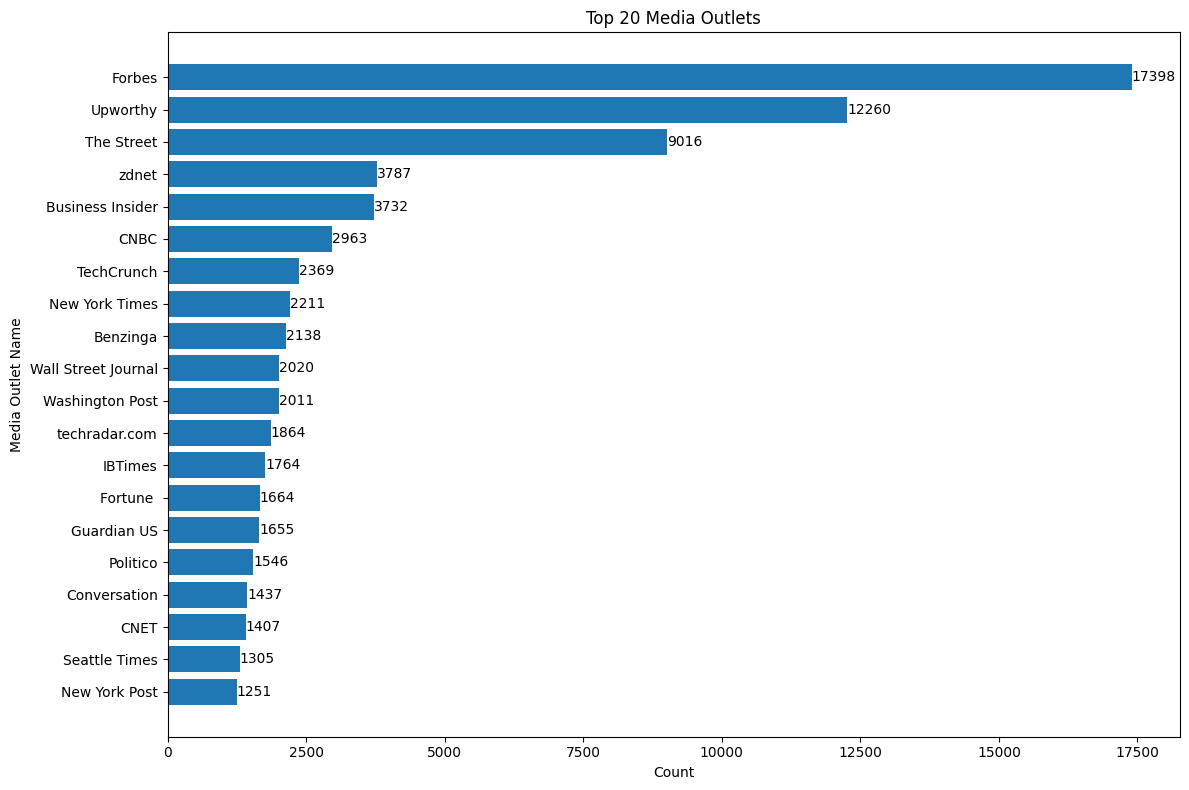

In [50]:
# Get the counts of unique values in the 'media_name' column
value_counts = urls['media_name'].value_counts()

# Select the top 50 values and sort in descending order
top_50_values = value_counts.head(20).sort_values(ascending=True)

# Set a larger figure size
plt.figure(figsize=(12, 8))
# Plot a bar chart with rotated x-axis labels
bars = plt.barh(top_50_values.index, top_50_values.values)

plt.xlabel('Count')
plt.ylabel('Media Outlet Name')

# Add title
plt.title('Top 20 Media Outlets')
# Add total count on each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

In [6]:
# Get the counts of unique values in the 'media_name' column
value_counts = urls['media_name'].value_counts()

# Select the top 50 values and sort in descending order
top_50_values = value_counts.head(50).sort_values(ascending=False)

# Convert the Series to a DataFrame
table_data = pd.DataFrame({'Media Outlet Name': top_50_values.index, 'Count': top_50_values.values})

# Print the table
print(table_data)

             Media Outlet Name  Count
0                       Forbes  17398
1                     Upworthy  12260
2                   The Street   9016
3                        zdnet   3787
4             Business Insider   3732
5                         CNBC   2963
6                   TechCrunch   2369
7               New York Times   2211
8                     Benzinga   2138
9          Wall Street Journal   2020
10             Washington Post   2011
11               techradar.com   1864
12                     IBTimes   1764
13                    Fortune    1664
14                 Guardian US   1655
15                    Politico   1546
16                Conversation   1437
17                        CNET   1407
18               Seattle Times   1305
19               New York Post   1251
20                       wired   1177
21             foxbusiness.com   1115
22                     Gizmodo   1072
23                    ABC News   1033
24               Star Tribune    1015
25          

In [25]:
len(urls)

122664

In [36]:
scraped = pd.read_pickle('/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Media Cloud/Data/scraped_news.pkl')
scraped = scraped.drop_duplicates(subset='URL', keep='first')

In [37]:
len(scraped)

122664

In [38]:
error_rows = scraped[scraped['Body'] == 'NA']
no_error_rows = scraped[scraped['Body'] != 'NA']

In [41]:
(no_error_rows)

,ID,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary,Error
0,1838925040,https://news.mongabay.com/2021/02/eye-in-the-s...,An interdisciplinary team of zoologists and co...,Environmental science and conservation news,[Terna Gyuse],2021-02-01 08:11:18+00:00,Eye in the Sky: Tech makes satellite imagery i...,"{Surveying, Conservation, Elephants, Endangere...",[],Satellite surveying still offers many advantag...,
1,1839017422,https://www.cnbc.com/2021/02/01/amazon-alphabe...,"Ali Ghodsi, co-founder and CEO of Databricks I...","Amazon is getting involved in the start-up, Da...",[Jordan Novet],2021-02-01 00:00:00,"Amazon, Alphabet and Salesforce are all invest...",{},"[Start-up, Venture capital, Microsoft Corp, Sa...","Ali Ghodsi, co-founder and CEO of Databricks I...",
2,1839009079,http://feeds.benzinga.com/~r/benzinga/~3/JWduJ...,One of the hottest names in the investing worl...,One of the hottest names in the investing worl...,[Chris Katje],None,15 Big Ideas In 'Disruptive Innovation' Accord...,"{Politics, Catherine Wood, Government, Digital...",[],One of the hottest names in the investing worl...,
3,1838767296,https://eurweb.com/2021/01/31/black-creators-a...,*It’s day four at the 2021 Sundance Film Festi...,,[Olivia T.],2021-01-31 00:00:00,Black Creators At Sundance 2021,"{Dear Philadelphia, Sophia Nahli Allison, Blac...",[],*It’s day four at the 2021 Sundance Film Festi...,
4,1839090241,http://feeds.benzinga.com/~r/benzinga/~3/y-hmu...,Loading... Loading...\n\nBill.com BILL shares ...,Bill.com (NYSE: BILL) shares are trading highe...,[Tanzeel Akhtar],None,Why Bill.com's Stock Is Trading Higher Today -...,"{why it's moving, Politics, Government, Volati...",[],Loading... Loading...Bill.com BILL shares are ...,
...,...,...,...,...,...,...,...,...,...,...,...
187809,1788086051,https://www.breitbart.com/tech/2019/11/03/repo...,"One year after 20,000 Google workers walked ou...","One year after 20,000 Google workers walked ou...",[Lucas Nolan],2019-11-03 00:00:00,Report: Google Employees Are ‘Madder Than Ever’,"{#MeToo, Free Speech Online, Google, Masters o...",[],"One year after 20,000 Google workers walked ou...",
187810,1798647064,https://www.breitbart.com/news/google-buying-f...,Washington (AFP) – Google agreed Friday to buy...,Washington (AFP) – Google agreed Friday to buy...,[],None,"Google buying Fitbit in move into wearables, d...","{Health, Ivy League Shame, China Mystery Outbr...",[],“Google aspires to create tools that help peop...,
187811,1851986549,https://theconversation.com/profiles/ana-santo...,Ana Santos Rutschman is a professor of law at ...,Ana Santos Rutschman’s profile on The Conversa...,[],None,Ana Santos Rutschman,{},[],Ana Santos Rutschman is a professor of law at ...,
187812,1941991962,https://www.businessinsider.com/googls-deepmin...,"Over the past two decades, scientists have bee...",Google's DeepMind team has created an artifici...,[Aylin Woodward],2019-11-12 00:00:00,Google's DeepMind is better than 99.8% of huma...,{},[],"Now, the research team at Google's DeepMind AI...",


In [42]:
result_df = urls.merge(error_rows, left_on='stories_id', right_on='ID', how='inner')
result_df = result_df.drop_duplicates(subset='URL', keep='first')

In [43]:
len(result_df)

49082

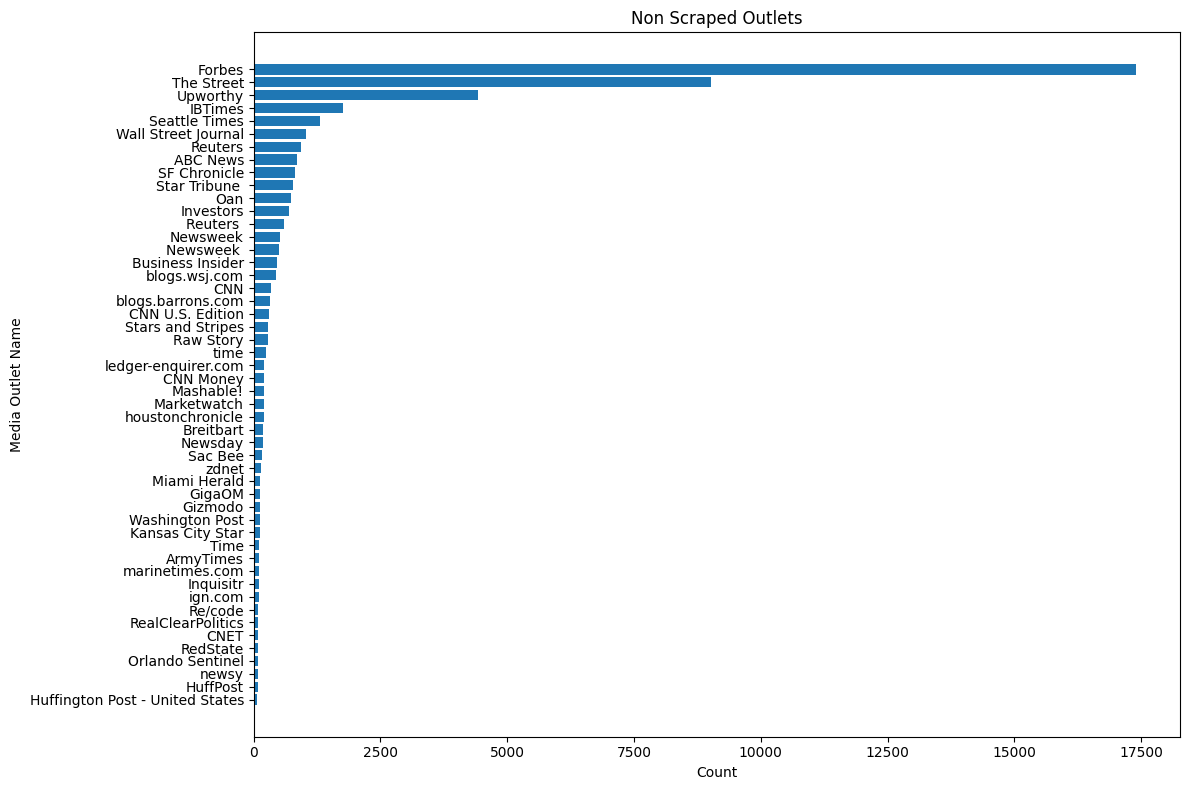

In [44]:
# Get the counts of unique values in the 'media_name' column
value_counts = result_df['media_name'].value_counts()

# Select the top 50 values and sort in descending order
top_50_values = value_counts.head(50).sort_values(ascending=True)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plot a bar chart with rotated x-axis labels
plt.barh(top_50_values.index, top_50_values.values)

plt.xlabel('Count')
plt.ylabel('Media Outlet Name')

# Add title
plt.title('Non Scraped Outlets')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
#plt.savefig('non-scraped-media.png')
plt.show()

In [45]:
# Get the counts of unique values in the 'media_name' column
value_counts_result = result_df['media_name'].value_counts()

# Select the top 50 values and sort in descending order
top_50_values_ns = value_counts_result.head(50).sort_values(ascending=False)

# Convert the Series to a DataFrame
table_data_ns = pd.DataFrame({'Media Outlet Name': top_50_values_ns.index, 'Count': top_50_values_ns.values})

# Print the table
print(table_data_ns)

                  Media Outlet Name  Count
0                            Forbes  17398
1                        The Street   9016
2                          Upworthy   4415
3                           IBTimes   1764
4                     Seattle Times   1305
5               Wall Street Journal   1029
6                           Reuters    943
7                          ABC News    860
8                      SF Chronicle    807
9                     Star Tribune     783
10                              Oan    743
11                        Investors    699
12                         Reuters     594
13                         Newsweek    519
14                        Newsweek     508
15                 Business Insider    469
16                    blogs.wsj.com    439
17                              CNN    339
18                blogs.barrons.com    315
19                 CNN U.S. Edition    300
20                Stars and Stripes    279
21                        Raw Story    276
22         

In [46]:
(result_df)

,ap_syndicated,collect_date,feeds,guid,language,media_id,media_name,media_url,metadata,processed_stories_id,...,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary,Error
0,False,2021-02-01 14:55:28.842599,NaN,https://www.ibtimes.com/sex-zoom-hookups-ai-fl...,en,41550,IBTimes,http://www.ibtimes.com/,"{'date_guess_method': None, 'extractor_version...",2248338036,...,https://www.ibtimes.com/sex-zoom-hookups-ai-fl...,NA,NA,NA,NA,NA,NA,NA,NA,Article `download()` failed with 403 Client Er...
1,False,2021-02-01 13:59:59.844832,NaN,https://www.ibtimes.com/ford-put-google-cloud-...,en,41550,IBTimes,http://www.ibtimes.com/,"{'date_guess_method': None, 'extractor_version...",2248350200,...,https://www.ibtimes.com/ford-put-google-cloud-...,NA,NA,NA,NA,NA,NA,NA,NA,Article `download()` failed with 403 Client Er...
2,False,2021-02-01 11:13:01.519961,NaN,content_60180108823d2900060567ba,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2248394116,...,https://www.forbes.com/sites/eliamdur/2021/02/...,NA,NA,NA,NA,NA,NA,NA,NA,Article `download()` failed with 403 Client Er...
3,False,2021-02-01 14:37:36.470448,NaN,https://www.baltimoresun.com/business/bs-bz-po...,en,34,Baltimore Sun,http://www.baltimoresun.com/,"{'date_guess_method': None, 'extractor_version...",2248402596,...,http://feeds.baltimoresun.com/~r/baltimoresun/...,NA,NA,NA,NA,NA,NA,NA,NA,Article `download()` failed with 404 Client Er...
4,False,2021-02-01 15:38:00.944005,NaN,content_6018414bed8a540006f23538,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2248447560,...,https://www.forbes.com/sites/stevebanker/2021/...,NA,NA,NA,NA,NA,NA,NA,NA,Article `download()` failed with 403 Client Er...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49077,False,2020-01-06 16:36:08.262740,NaN,https://parade.com/951214/alexandra-hurtado/di...,en,33514,Parade,http://www.parade.com#spider,"{'date_guess_method': None, 'extractor_version...",1884810236,...,https://parade.com/951214/alexandra-hurtado/di...,NA,NA,NA,NA,NA,NA,NA,NA,Article `download()` failed with 403 Client Er...
49078,False,2020-03-18 02:39:28.974520,NaN,https://www.investors.com/research/ibd-stock-o...,en,27011,Investors,http://www.investors.com,"{'date_guess_method': None, 'extractor_version...",1958895568,...,https://www.investors.com/research/ibd-stock-o...,NA,NA,NA,NA,NA,NA,NA,NA,Article `download()` failed with 403 Client Er...
49079,False,2020-03-18 23:27:01.450420,NaN,https://www.investors.com/news/technology/digi...,en,27011,Investors,http://www.investors.com,{'date_guess_method': {'stories_id': 155249903...,1959727867,...,https://www.investors.com/news/technology/digi...,NA,NA,NA,NA,NA,NA,NA,NA,Article `download()` failed with 403 Client Er...
49080,False,2020-08-07 06:57:03.814853,NaN,https://blogs.wsj.com/experts/2019/11/27/why-o...,en,1150,Wall Street Journal,https://www.wsj.com/,{'date_guess_method': {'stories_id': 167690731...,2090235874,...,https://blogs.wsj.com/experts/2019/11/27/why-o...,NA,NA,NA,NA,NA,NA,NA,NA,Article `download()` failed with 403 Client Er...


In [13]:
pip install tabulate


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:

# Get the counts of unique values in the 'media_name' column for scraped URLs
value_counts = urls['media_name'].value_counts()

# Select the top 50 values and sort in descending order
top_50_values_scraped = value_counts.head(50).sort_values(ascending=False)

# Convert the Series to a DataFrame for scraped URLs
table_data_scraped = pd.DataFrame({'Media Outlet Name (Scraped)': top_50_values_scraped.index, 'Count (Scraped)': top_50_values_scraped.values})

# Get the counts of unique values in the 'media_name' column for raw URLs
value_counts_result = result_df['media_name'].value_counts()

# Select the top 50 values and sort in descending order for raw URLs
top_50_values_ns = value_counts_result.head(50).sort_values(ascending=False)

# Convert the Series to a DataFrame for raw URLs
table_data_ns = pd.DataFrame({'Media Outlet Name (Not Scraped)': top_50_values_ns.index, 'Count (Not Scraped)': top_50_values_ns.values})

# Merge the two DataFrames
merged_table = pd.concat([table_data_scraped, table_data_ns], axis=1)

# Create a new Word document
doc = Document()

# Add a heading
doc.add_heading('Top 50 Media Outlets', level=1)

# Add a paragraph with the table
table = doc.add_table(rows=1, cols=len(merged_table.columns))
table.style = 'Table Grid'

# Add column headers
hdr_cells = table.rows[0].cells
for i, column_name in enumerate(merged_table.columns):
    hdr_cells[i].text = column_name

# Add rows to the table
for index, row in merged_table.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(value)

# Save the document
doc.save('top_media_outlets.docx')


In [51]:
import pandas as pd

In [52]:
urls_raw = pd.read_pickle('/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Media Cloud/Data/media_urls.pkl')

In [53]:
urls_raw = urls_raw.drop_duplicates(subset=['url'],keep='first')

In [54]:
# Convert 'publish_date' to datetime
urls_raw['publish_date'] = pd.to_datetime(urls_raw['publish_date'], errors='coerce')

# Extract year-month
urls_raw['year_month'] = urls_raw['publish_date'].dt.to_period('M')

# Group by year-month and get the distribution
publish_date_distribution = urls_raw['year_month'].value_counts().sort_index()

# Display the distribution
print("Publish Date Distribution by Year-Month:")
print(publish_date_distribution)

Publish Date Distribution by Year-Month:
year_month
2013-10      81
2013-11      61
2013-12     104
2014-01     138
2014-02      79
           ... 
2023-07    5674
2023-08    4597
2023-09    5299
2023-10    4490
2023-11    3069
Freq: M, Name: count, Length: 117, dtype: int64


In [57]:
# Define the specific year and month you're interested in
specific_period = pd.Period('2021-09', freq='M')

# Filter the DataFrame for the specific month and year
specific_month_data = urls_raw[urls_raw['year_month'] == specific_period]

# Display the filtered DataFrame
print("Data for Specific Month-Year:")
len(specific_month_data)

Data for Specific Month-Year:


840

In [58]:
specific_month_data

,ap_syndicated,collect_date,feeds,guid,language,media_id,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count,year_month
117610,False,2021-09-01 06:20:32.508137,NaN,https://eurweb.com/?p=906705,en,25336,eurweb,http://www.eurweb.com,"{'date_guess_method': None, 'extractor_version...",2431292926,2021-09-01 05:35:05,2029616076,[],New Fitness App (Rumble) Gives Real-World Rewa...,https://eurweb.com/2021/09/01/new-fitness-app-...,NaN,2021-09
117611,False,2021-09-01 07:08:10.332417,NaN,612f56b5a5c85a00063e48de,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2431331543,2021-09-01 07:05:10,2029654786,[],Indian Tech Founder’s Persistence Pays Off And...,https://www.forbes.com/sites/anuraghunathan/20...,NaN,2021-09
117613,False,2021-09-01 07:40:35.033522,NaN,https://time.com/?p=6094156,en,4419,Time,http://time.com,"{'date_guess_method': None, 'extractor_version...",2431392121,2021-09-01 07:30:31,2029685805,[],Here’s What to Know About China’s Sweeping Tec...,https://time.com/6094156/china-big-tech-regula...,NaN,2021-09
117614,False,2021-09-01 03:08:55.780177,NaN,"tag:theconversation.com,2011:article/166966",en,54346,Conversation,https://theconversation.com/us,"{'date_guess_method': None, 'extractor_version...",2431398353,2021-09-01 02:39:22,2029517360,[],Is Google getting worse? Increased advertising...,https://theconversation.com/is-google-getting-...,NaN,2021-09
117615,False,2021-09-01 07:42:25.749367,NaN,https://www.thestreet.com/press-releases/coach...,en,21619,The Street,http://www.thestreet.com,"{'date_guess_method': None, 'extractor_version...",2431400375,2021-09-01 07:03:00,2029694659,[],CoachHub Secures $80M To Democratize Coaching,https://www.thestreet.com/press-releases/coach...,NaN,2021-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118893,False,2021-09-15 16:11:11.227683,NaN,8801631726446,en,1706,UPI,http://www.upi.com/,"{'date_guess_method': None, 'extractor_version...",2447771562,2021-09-15 15:32:05,2043930691,"[{'stories_id': 2043930691, 'tag': 'geonames_6...","Prince Harry, Meghan Markle, Billie Eilish, Ka...",https://www.upi.com/Top_News/US/2021/09/15/TIM...,NaN,2021-09
118894,False,2021-09-15 16:12:14.386584,NaN,https://www.breitbart.com/europe/2021/09/15/au...,en,19334,Breitbart,http://www.breitbart.com,"{'date_guess_method': None, 'extractor_version...",2447773761,2021-09-15 10:57:24,2043932898,"[{'stories_id': 2043932898, 'tag': 'geonames_6...",Australia Goes Nuclear: Axes $90b French Subma...,http://feedproxy.google.com/~r/breitbart/~3/ml...,NaN,2021-09
118895,True,2021-09-15 16:12:47.584560,NaN,http://feedproxy.google.com/~r/businessinsider...,en,18710,Business Insider,http://www.businessinsider.com,"{'date_guess_method': None, 'extractor_version...",2447774712,2021-09-15 16:08:50,2043934607,"[{'stories_id': 2043934607, 'tag': 'nyt_labell...",How to set up and use the Google Home app on y...,http://feedproxy.google.com/~r/businessinsider...,NaN,2021-09
118896,False,2021-09-15 16:16:57.845549,NaN,61424d48bbf74b0006a82d6d,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2447782310,2021-09-15 15:57:31,2043942120,"[{'stories_id': 2043942120, 'tag': 'nyt_labell...","Arrcus Lands Ayyar as New CEO, Softbank Invest...",https://www.forbes.com/sites/rscottraynovich/2...,NaN,2021-09
